## **Exercise 3: Uber POOL Case**

### 1. Based on the HBS Case Study, what is the difference between Uber POOL and Express POOL?

**Answer 1**

Uber POOL offers a discounted fare to riders willing to carpool with other passengers, a door-to-door pick-up and drop-off service, with no walking around required. Express POOL, on the other hand, offered a reduced price to riders willing to carpool, walk a short distance, to/from their pick-up and drop-off points, and wait for two minutes before being matched to a driver.

### 2. How did Uber use surveys in designing Uber Express Pool?


**Answer 2**

While designing Express Pool, Uber wanted to assess riders' willingness to wait and walk at different price points, for which Uber sent a segment of it's riders a conjoint survey that measured consumers' sensitivity to different variables. As a result of the survey, Uber built a calculator that aimed to predict pricing thersholds based on walking and waiting parameters.

### 3. Suppose Uber was considering a new algorithm to recommend ride destinations in the app. Which type of research strategy should they use (A/B Test, Switchback, Synthetic Control)?


**Answer 3**

Uber should use an A/B Test research strategy to evaluate the effectiveness of the new algorithm for recommending ride destinations in the app. This method would allow them to compare the performance of the new algorithm against the existing one by randomly assigning riders to either the control group (existing algorithm) or the treatment group (new algorithm) and measuring key metrics such as user satisfaction or ride completion rates.

### 4. Create two new columns in the dataset that represent the total number of trips for both pool products and the profit from these products.


In [ ]:
# Loading the data
import pandas as pd

path = '/workspaces/assignment-4-SnehaEkka/wait_time_switchback_3.csv'
data = pd.read_csv(path)
data.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout_sr,total_matches_sr,total_double_matches_sr,revenue
0,Boston,2/19/18 7:00,2 mins,False,True,1417,3252,256,34459.41163,3365,1479,46041.85585
1,Boston,2/19/18 9:40,5 mins,True,False,1462,2364,201,29770.34982,2292,1279,32174.38133
2,Boston,2/19/18 12:20,2 mins,False,False,1360,2189,115,27446.36736,2288,957,31042.59758
3,Boston,2/19/18 15:00,5 mins,True,True,1977,3580,356,44992.45299,4040,2029,53747.43785
4,Boston,2/19/18 17:40,2 mins,False,False,1368,2575,187,27582.95530,2193,975,32799.79836


In [ ]:
# Creating 2 new columns
data['total_trips'] = data['trips_pool'] + data['trips_express_pool']
data['profit'] = data['revenue'] - data['total_driver_payout_sr']
data.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout_sr,total_matches_sr,total_double_matches_sr,revenue,total_trips,profit
0,Boston,2/19/18 7:00,2 mins,False,True,1417,3252,256,34459.41163,3365,1479,46041.85585,4669,11582.44422
1,Boston,2/19/18 9:40,5 mins,True,False,1462,2364,201,29770.34982,2292,1279,32174.38133,3826,2404.03151
2,Boston,2/19/18 12:20,2 mins,False,False,1360,2189,115,27446.36736,2288,957,31042.59758,3549,3596.23022
3,Boston,2/19/18 15:00,5 mins,True,True,1977,3580,356,44992.45299,4040,2029,53747.43785,5557,8754.98486
4,Boston,2/19/18 17:40,2 mins,False,False,1368,2575,187,27582.95530,2193,975,32799.79836,3943,5216.84306


###  5. Plot the average number of trips as a function of the time of the day. Describe a reason why this pattern exists.


In [ ]:
data['period_start'].dtype

dtype('O')

In [ ]:
# Creating 'hour_of_day' and 'time_of_day' columns
data['period_start'] = pd.to_datetime(data['period_start'])

# Extract hour of the day
data['hour_of_day'] = data['period_start'].dt.hour

# Map hour of the day to time categories
def categorize_time(hour):
    if hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Get time of day
data['time_of_day'] = data['hour_of_day'].apply(categorize_time)

data.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout_sr,total_matches_sr,total_double_matches_sr,revenue,total_trips,profit,hour_of_day,time_of_day
0,Boston,2018-02-19 07:00:00,2 mins,False,True,1417,3252,256,34459.41163,3365,1479,46041.85585,4669,11582.44422,7,early morning
1,Boston,2018-02-19 09:40:00,5 mins,True,False,1462,2364,201,29770.34982,2292,1279,32174.38133,3826,2404.03151,9,morning
2,Boston,2018-02-19 12:20:00,2 mins,False,False,1360,2189,115,27446.36736,2288,957,31042.59758,3549,3596.23022,12,afternoon
3,Boston,2018-02-19 15:00:00,5 mins,True,True,1977,3580,356,44992.45299,4040,2029,53747.43785,5557,8754.98486,15,afternoon
4,Boston,2018-02-19 17:40:00,2 mins,False,False,1368,2575,187,27582.95530,2193,975,32799.79836,3943,5216.84306,17,evening


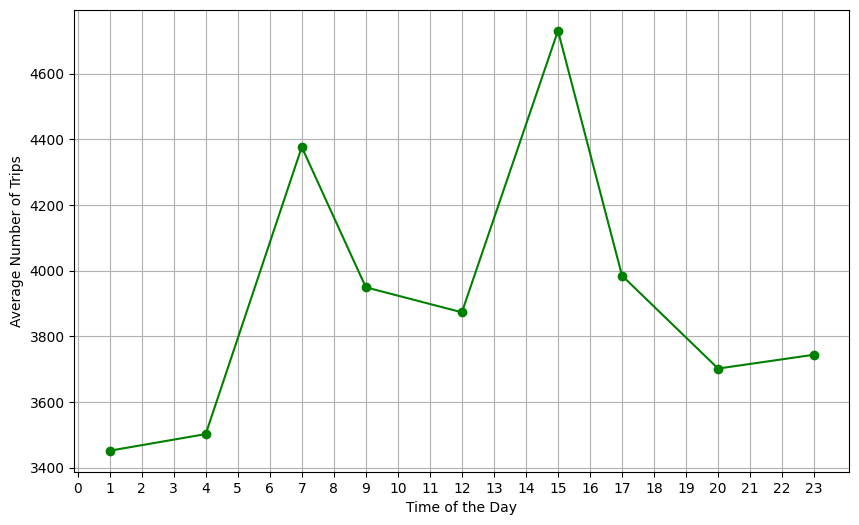

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate the data by time of the day and calculate the average number of trips
avg_trips_by_time = data.groupby('hour_of_day')['total_trips'].mean().reset_index()

# Plot the average number of trips as a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_trips_by_time['hour_of_day'], avg_trips_by_time['total_trips'],
         marker='o', linestyle='-', color='green')
plt.xlabel('Time of the Day')
plt.ylabel('Average Number of Trips')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show();

**Answer 5**

The average number of trips is highest in the morning (7:00 am) and afternoon (3:00 PM), with a moderate frequency during rush hours 9:00-12:00 AM and 5:00-8:00 PM. This is likely due people making trips for school, work or errands during the morning and evening hours, while they are less likely to travel during the middle of the day or early hours in the morning.

###  6. Conduct a regression analysis of the experiment (considering the outcomes: revenue, total_driver_payout_sr, rider_cancellations, total_trips). Make sure to think carefully about the correct regression specification. The regression output should be easy to read, so use ‘etable’ or ‘modelsummary’. What do you learn in words from this regression analysis?


In [ ]:
# Outcomes: revenue, total_driver_payout_sr, rider_cancellations, total_trips

import statsmodels.formula.api as sm

# Creating and fitting the 4 models
model1 = sm.ols(formula = f'revenue ~ treat + commute', data=data).fit(cov_type='HC1')
model2 = sm.ols(formula = f'total_driver_payout_sr ~ treat + commute', data=data).fit(cov_type='HC1')
model3 = sm.ols(formula = f'rider_cancellations ~ treat + commute', data=data).fit(cov_type='HC1')
model4 = sm.ols(formula = f'total_trips ~ treat + commute', data=data).fit(cov_type='HC1')

# Regression Results
print(f"Regression Results for: revenue")
print(model1.summary())
print(f"Regression Results for: total_driver_payout_sr")
print(model2.summary())
print(f"Regression Results for: rider_cancellations")
print(model3.summary())
print(f"Regression Results for: total_trips")
print(model4.summary())

Regression Results for: revenue
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     93.54
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.01e-25
Time:                        16:18:58   Log-Likelihood:                -1217.4
No. Observations:                 126   AIC:                             2441.
Df Residuals:                     123   BIC:                             2449.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept 

**Answer 6**

The regression analysis reveals that the 5-minute wait-time experiment has mixed effects. It negatively impacts revenue, driver payouts, and total trips, while increasing rider cancellations. Though not statistically significant for revenue and total trips, it significantly reduces driver payouts and boosts rider cancellations. This suggests a potential trade-off between cost efficiency and customer satisfaction, necessitating a careful balance between the two.

### 7. One of your data scientists suggests that the optimal wait time may differ by whether it’s a commuting period. Test whether the effects of a 5 minute wait period on total trips and cancelations differ by whether it’s a commuting period (the column 'commute'). Which policy works better during commute times?

In [ ]:
# Checking the 'wait_time' column
print(data['wait_time'].value_counts())

2 mins    63
5 mins    63
Name: wait_time, dtype: int64


In [ ]:
# Outcome: Total trips | Regress on wait_time and commute
formula = f"total_trips ~ wait_time*commute"
model = sm.ols(formula=formula, data=data).fit(cov_type='HC1')
print(f"Regression Results for: total_trips")
print(model.summary())

Regression Results for: total_trips
                            OLS Regression Results                            
Dep. Variable:            total_trips   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     34.00
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.84e-16
Time:                        16:19:22   Log-Likelihood:                -928.28
No. Observations:                 126   AIC:                             1865.
Df Residuals:                     122   BIC:                             1876.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
# Outcome: Rider cancellations | Regress on wait_time and commute
formula = f"rider_cancellations ~ wait_time*commute"
model = sm.ols(formula=formula, data=data).fit(cov_type='HC1')
print(f"Regression Results for: rider_cancellations")
print(model.summary())

Regression Results for: rider_cancellations
                             OLS Regression Results                            
Dep. Variable:     rider_cancellations   R-squared:                       0.726
Model:                             OLS   Adj. R-squared:                  0.720
Method:                  Least Squares   F-statistic:                     112.1
Date:                 Tue, 05 Mar 2024   Prob (F-statistic):           6.59e-35
Time:                         16:19:43   Log-Likelihood:                -595.02
No. Observations:                  126   AIC:                             1198.
Df Residuals:                      122   BIC:                             1209.
Df Model:                            3                                         
Covariance Type:                   HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

**Answer 7**

- **Total Trips Model:** The interaction of 'wait_time' and 'commute' shows a notable increase in total trips during commute hours. Although there appears to be a slight decrease in trips with the treatment during commutes, it lacks statistical significance.
- **Rider Cancellations Model:** The interaction reveals a significant increase in cancellations with a 5-minute wait time during commute hours compared to a 2-minute wait time.

These findings suggest that implementing a 2-minute wait-time policy could effectively reduce rider cancellations and enhance customer satisfaction. However, the impact on total trips remains inconclusive, necessitating further investigation to determine the optimal wait-time policy for increasing trip numbers.